<h1><center> ML ASSIGNMENT 2 - Income Prediction </center></h1>

<h4>Dataset: Adult income classification
<br>
<br>
Group No: 49
<br>
<br>
Group Members:</h4>
<table align = "left">
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>Shehza Fathima</td>
    <td>2021C104174</td>
  </tr>
  <tr>
    <td>Nithin Krishnan</td>
    <td>2021C104176</td>
  </tr>
  <tr>
    <td>Binsu Elizabeth Varghese</td>
    <td>2021C104187</td>
  </tr>
</table>

<h2 style="color: #2f80d0">Import Libraries/Dataset</h2>

In [71]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
from scipy.stats import skew
import seaborn as sns
from prettytable import PrettyTable
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# For feature selections and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from collections import Counter


# Importing the KNeighborsClassifier and svm algorithms for model building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# For Analyzing the models
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score

In [72]:
#Defining class colour
class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

In [73]:
#Importing dataset
df = pd.read_csv('adult.csv')

<h2 style="color: #2f80d0">1. Data Visualization and Exploration</h2>

<h4 style="color: #2f80d0">1.1. a) Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</h4>

In [74]:
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


<h4 style="color: #2f80d0">1.1 b) Analysing the size of Dataset</h4>

In [75]:
#Size of the Dataset
print(color.BLUE + color.BOLD + "\nSize of Dataset:" + color.END)
print(df.shape)


Size of Dataset:
(48842, 15)


<h4 style="color: #2f80d0">1.2) Comment on class imbalance with appropriate visualization method.</h4>

Classification of Income:
<=50K    37155
>50K     11687
Name: income, dtype: int64


<AxesSubplot:ylabel='income'>

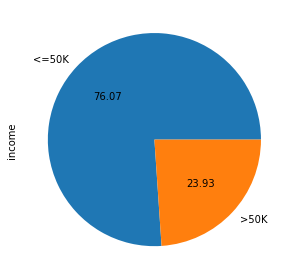

In [76]:
#Balanced or Imbalanced Dataset
print(color.BLUE + color.BOLD + "Classification of Income:" + color.END)
count = df['income'].value_counts()
print(count)
count.plot.pie(autopct='%.2f')

<div style="color: #2f80d0"><b>Analysis:</b><br> From the piechart we see that the dataset is highly imbalanced as 76% of the outcome variable (income) is having the class "<=50k" and 24% is having the class ">50k". Higher imbalance in the output class variable can hamper our model accuracy. In our further steps, we are going to introduce sampling methods that would be applied to the outcome variable to eliminate the imbalance.</div>


<h4 style="color: #2f80d0">Identify and handle NULL values</h4>

In [77]:
# Replace ? with python NaN
df.replace("?", np.NaN,inplace=True)

In [78]:
#Count of NaN/Null values from dataset
print(color.BLUE + color.BOLD + "\nCount of NaN/Null values for each feature:" + color.END)
print(df.isnull().sum())


Count of NaN/Null values for each feature:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [79]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column
mode1 = df['workclass'].value_counts().idxmax()
mode2 = df['occupation'].value_counts().idxmax()
mode3 = df['native-country'].value_counts().idxmax()
df['workclass'] = df['workclass'].fillna(mode1)
df['occupation'] = df['occupation'].fillna(mode2)
df['native-country'] = df['native-country'].fillna(mode3)

In [80]:
# Attribute and its datatype
ptbl = PrettyTable()

for attribute in df.columns:    
    ptbl.field_names = ["Attribute Name", "Data Type"]
    ptbl.add_row([attribute, df[attribute].dtype])
    
print(ptbl)

+-----------------+-----------+
|  Attribute Name | Data Type |
+-----------------+-----------+
|       age       |   int64   |
|    workclass    |   object  |
|      fnlwgt     |   int64   |
|    education    |   object  |
| educational-num |   int64   |
|  marital-status |   object  |
|    occupation   |   object  |
|   relationship  |   object  |
|       race      |   object  |
|      gender     |   object  |
|   capital-gain  |   int64   |
|   capital-loss  |   int64   |
|  hours-per-week |   int64   |
|  native-country |   object  |
|      income     |   object  |
+-----------------+-----------+


In [81]:
#Distribution Of Data
distTxt = color.BLUE + color.BOLD + "Data Distribution of numerical attributes" + color.END
print(distTxt.center(100))
df.describe()

                       Data Distribution of numerical attributes                       


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [82]:
#Distribution Of Data
distTxt = color.BLUE + color.BOLD + "Data Distribution of categorical attributes" + color.END
print(distTxt.center(100))
df.describe(include=["O"])

                      Data Distribution of categorical attributes                      


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


In [83]:
# Mapping binary values to the target variable
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [84]:
columnsList = list(df)
categoricalList = list(df.select_dtypes(include=['object']).columns)
numericalList = list(set(columnsList) - set(categoricalList))

#Character or Numerical Data
print(color.BLUE + color.BOLD + "Categorical Data:" + color.END)
print(categoricalList)
print(color.BLUE + color.BOLD + "\nNumerical Data:" + color.END)
print(numericalList)

Categorical Data:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Numerical Data:
['fnlwgt', 'hours-per-week', 'educational-num', 'capital-loss', 'capital-gain', 'age', 'income']


In [85]:
print("Qualitiative Features: ", len(categoricalList))
print(categoricalList)
print('----------------------------------------')

for column in categoricalList:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(df[column].unique()))

        # Diplays count of each value of the column
        print(df[column].value_counts())

        print("_________________________________________________________________")

Qualitiative Features:  8
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
----------------------------------------
workclass : ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
_________________________________________________________________
education : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school

In [86]:
print("Quantitative Features: ", len(numericalList))
print(numericalList)
print("-----------------------------------")

for column in numericalList:

        # Lists all coloumns and unique value in them
        print(str(column) + ' : ' + str(df[column].unique()))

        # Diplays count of each value of the column
        print(df[column].value_counts())

        print("_________________________________________________________________")

Quantitative Features:  7
['fnlwgt', 'hours-per-week', 'educational-num', 'capital-loss', 'capital-gain', 'age', 'income']
-----------------------------------
fnlwgt : [226802  89814 336951 ... 129912 255835 257302]
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64
_________________________________________________________________
hours-per-week : [40 50 30 32 10 39 35 48 25 20 45 47  6 43 90 54 60 38 36 18 24 44 56 28
 16 41 22 55 14 33 37  8 12 70 15 75 52 84 42 80 68 99 65  5 17 72 53 29
 96 21 46  3  1 23 49 67 76  7  2 58 26 34  4 51 78 63 31 92 77 27 85 13
 19 98 62 66 57 11 86 59  9 64 73 61 88 79 89 74 69 87 97 94 82 91 81 95]
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
79        1
94        1
87        1
82        1
69        1
Name: hours-per-week, Length: 96, dtype: int64
____________________________________________

                         Count Plot for Categorical Attributes                         


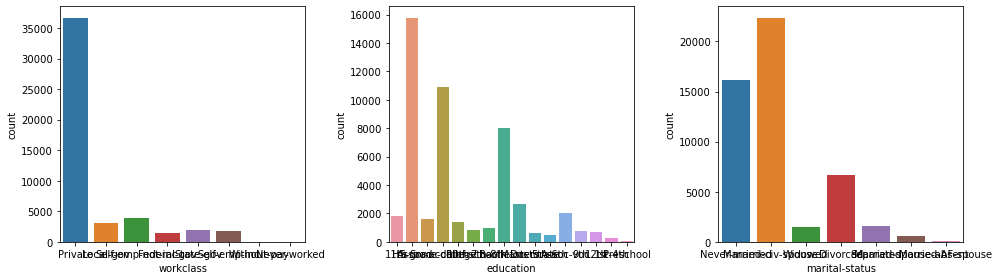

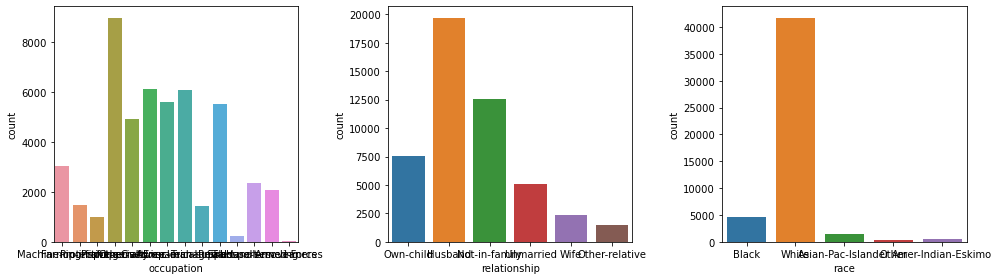

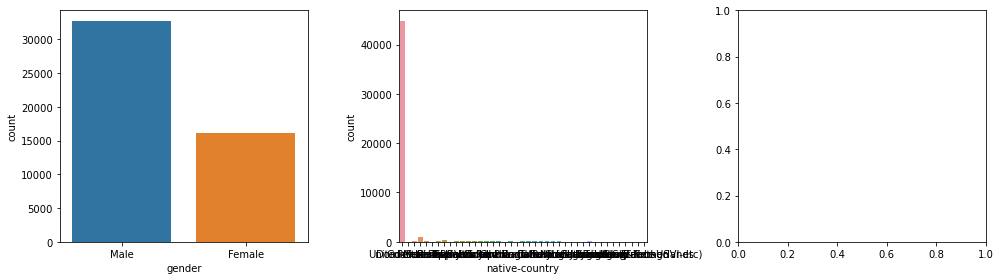

In [87]:
#Count Plots (for categorical attributes)
catPlotTxt = color.BLUE + color.BOLD + "Count Plot for Categorical Attributes" + color.END
print(catPlotTxt.center(100))

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

index = 0
graphsInARow = 3

for attr in categoricalList:
    
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
        
    sns.countplot(x=attr, data=df, ax = ax[index % graphsInARow])
    index = index + 1
    
    if (index % graphsInARow == 0):
        plt.show()

                       Histogram Plot for Continuous Attributes                        


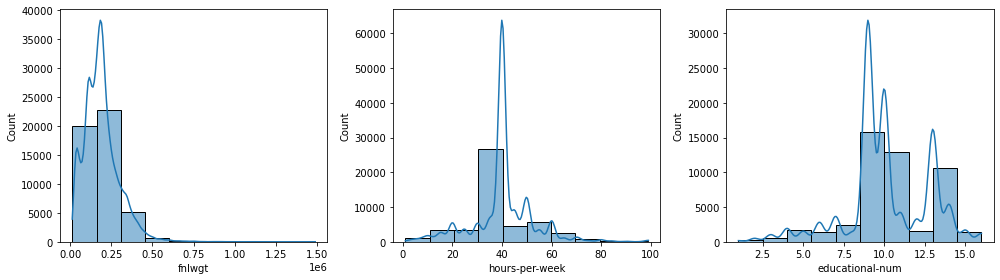

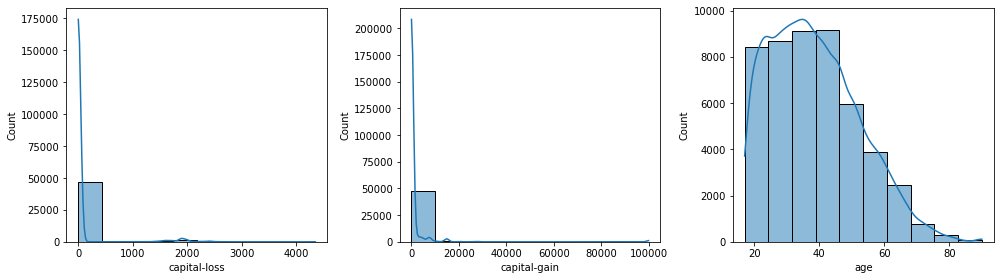

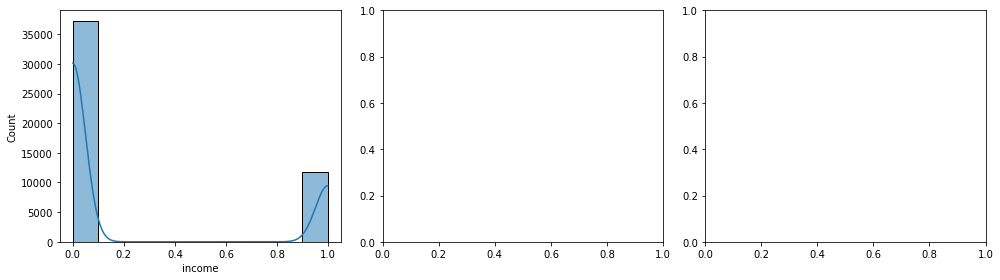

In [88]:
#Histogram Distribution (for Continuous Attributes)
histPlotTxt = color.BLUE + color.BOLD + "Histogram Plot for Continuous Attributes" + color.END
print(histPlotTxt.center(100))

plt.rcParams["figure.figsize"] = [14.00, 4.0]
plt.rcParams["figure.autolayout"] = True

index = 0
graphsInARow = 3

for attr in numericalList:
    if (index % graphsInARow == 0):
        f, ax = plt.subplots(1, graphsInARow)
    sns.histplot(data=df[attr], bins=10, kde=True, ax = ax[index % graphsInARow])
    index = index + 1
    if (index % graphsInARow == 0):
        plt.show()

                                         Correlation Using HeatMap                                         


<AxesSubplot:>

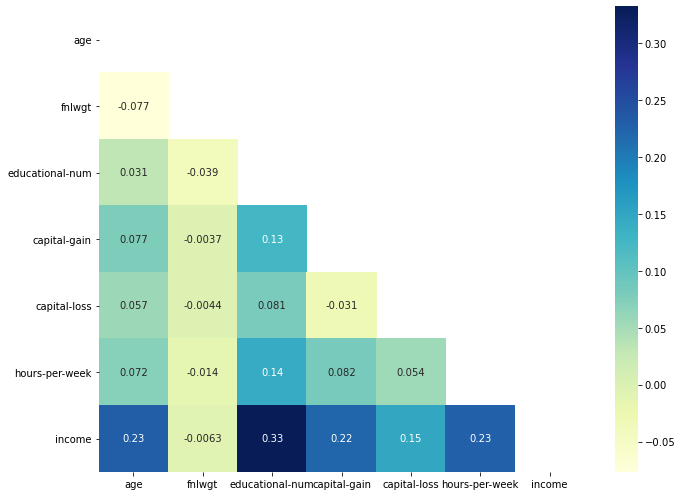

In [89]:
#Correlation of the features in the dataset
corr = df.corr()

corrTxt = color.BLUE + color.BOLD + "Correlation Using HeatMap" + color.END
print(corrTxt.center(120))

#Visualizing correlation using Heatmap
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, mask=mask, annot = True, cmap='YlGnBu')
#sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [20]:
#Dropping the column with higher correlation
df.drop(['fnlwgt'], axis = 1, inplace = True)

<div style="color: #2f80d0"><b>Analysis:</b><br>Correlational Analysis have an effect on feature selection. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.<br>Here column 'fnlwgt' has higher negative correlation, thus it can be dropped</div> 

<h4>2. Data Pre-processing and cleaning</h4>
1. Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. <br><br>2. Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.

<h4 style="color: #2f80d0">2.1. Null values has been identified and handled in the steps before the visualisation.</h4>

In [90]:
print(color.BLUE + color.BOLD + "\nCount of NaN/Null values for each feature after handling:" + color.END)
print(df.isnull().sum())


Count of NaN/Null values for each feature after handling:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


<h4 style="color: #2f80d0">2.2. Feature Engineering techniques</h4>

In [92]:
#Splitting the data set into features and outcome
X = df.drop(['income'], axis=1)
Y = df['income']

In [93]:
#Splitting the data into test data and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [94]:
for feature in categoricalList:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

<AxesSubplot:xlabel='feature'>

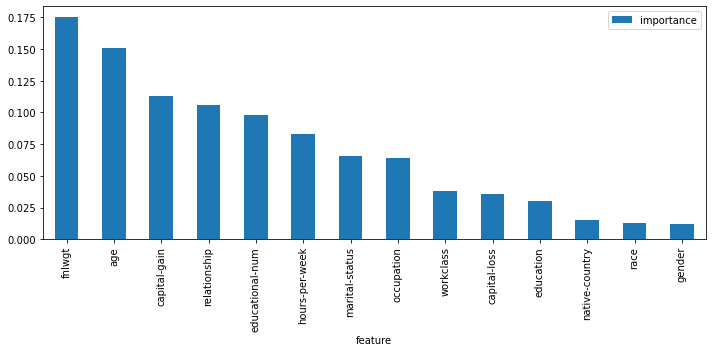

In [95]:
#Finding significance of each feature using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

#Plotting the significance of each feautre
importances.plot.bar(figsize=(10,5))

<div style="color: #2f80d0"><b>Inference:</b><br> We can find that Gender, Age and Native-Country features hardly have any significance and thus we can drop these columns to avoid overfitting</div> 

In [96]:
#Dropping the columns with least significance
df  = df.drop("gender", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native-country", axis=1)
categoricalList.remove("gender")
categoricalList.remove("race")
categoricalList.remove("native-country")

<h4 style="color: #2f80d0">Splitting the data set to train and test set to perform feature enginerring techniques </h4>

In [97]:
#Splitting the data set into features and outcome
X = df.drop(['income'], axis=1)
#Splitting the data into test data and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [98]:
#Transform the non numerical data into numerical
for feature in categoricalList:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [99]:
#Using StandardScalar to normalise the dataset
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

print(color.BLUE + color.BOLD + 'Standardized or z-score Normalized Train Dataset:\n' + color.END)
X_train.head(2)

Standardized or z-score Normalized Train Dataset:



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
0,-0.849978,-1.887643,-0.551219,1.212393,-0.027733,-0.406325,-1.554732,0.969833,-0.144199,-0.216492,-0.034027
1,0.241031,-0.094859,1.687545,-2.650223,-1.587187,-0.406325,-1.049322,0.969833,-0.144199,-0.216492,0.207331


In [100]:
#Dimensionality Reduction using PCA
pca = PCA(.95)

pca.fit(X_train)

X_train_pca = pca.transform(X_train) #PCA transformation on Train Set
X_test_pca = pca.transform(X_test) #PCA transformation on Test Set

#How much information (variance) attributed to each of the principal components
explained_variance = pca.explained_variance_ratio_

print(color.BLUE + color.BOLD + 'Variance attributed to each of the principal components:' + color.END)
print(explained_variance)

Variance attributed to each of the principal components:
[0.16101517 0.1198346  0.09489461 0.09340297 0.09305052 0.08950493
 0.08355292 0.08177558 0.07127777 0.05709181 0.05459912]


In [101]:
#Handling the Dataset Imbalance Using Hybridization: SMOTE + Tomek Links
counter = Counter(Y_train) #Before Sampling, count of Y_train
print(color.BLUE + color.BOLD + 'Before Sampling:' + color.END)
print(counter)

#Oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)  #To get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train_pca, Y_train) #Fit the resampled model

counter = Counter(y_train_smtom) #After Sampling, Count of y_train_smtom
print(color.BLUE + color.BOLD + 'After Sampling:' + color.END)
print(counter)

Before Sampling:
Counter({0: 26017, 1: 8172})
After Sampling:
Counter({0: 25302, 1: 25302})


<h4 style="color: #2f80d0">3. Model Building</h4>
1. Split the dataset into training and test sets. Answers without justification will not be awarded marks

<h4 style="color: #2f80d0">3.1 Splitting the training and test sets </h4>

<div style="color: #2f80d0">We split the dataset to train and test datsets while performing the feature engineering techniques.<br><br>A Split Ratio of 70:30 has been used due to the below reasons: <br>To build a reliable machine learning model, you need to split your dataset into the training and test sets. If not results will be biased, and will end up with a false impression of better model accuracy.<br>We have a relatively large dataset and also We have more number of Predictor Variables, making the model more complex. Hence a large split of data should be kept in training set.<br>Also we are not taking much less test data as with less testing data, the model performance statistic will have greater variance.</div> 

<h4 style="color: #2f80d0">3.2 Model Building using SVM and KNN </h4>

In [102]:
#Applying the K Nearest Neighbour (KNN) algorithm
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_smtom, y_train_smtom) 
Y_pred_knn = knn.predict(X_test_pca)
acc_knn = round(knn.score(X_train_smtom, y_train_smtom) * 100, 2)
print("Accuracy of KNN model is",metrics.accuracy_score(Y_test, Y_pred_knn))

Accuracy of KNN model is 0.786460110557565


In [103]:
#Applying the Support Vector Machine (SVM) algorithm
linear_svc = LinearSVC()
linear_svc.fit(X_train_smtom, y_train_smtom)
Y_pred_svc = linear_svc.predict(X_test_pca)
acc_linear_svc = round(linear_svc.score(X_train_smtom, y_train_smtom) * 100, 2)
print("Accuracy of SVM model is",metrics.accuracy_score(Y_test, Y_pred_svc))

Accuracy of SVM model is 0.7597079096430766


<h4 style="color: #2f80d0">4. Performance Evaluation</h4>

<h4 style="color: #2f80d0">4.1 Prediction for the test data and Performance Evaluation </h4>

In [104]:
#Plotting the accuracy of the used algorithms to find the best fit
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN'],
    'Score': [acc_linear_svc, acc_knn]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(2)

,Model
Score,
94.31,KNN
76.88,Support Vector Machines


<div style="color: #2f80d0"><b>Inference:</b><br> We can find that KNN has higer accuracy score and thus can be chosen as the best fit model.</div> 

<h4 style="color: #2f80d0">Identify the best parameter for KNN model </h4>

Minimum error is 0.19565959189244522 at K = 2


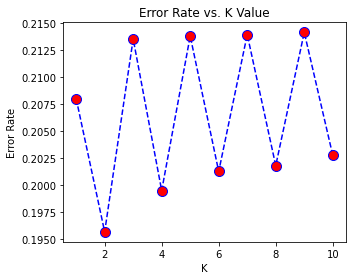

In [105]:
# Identify the K value with minimum error rate
error_rate = []
for i in range(1,11):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_smtom, y_train_smtom)
 pred_i = knn.predict(X_test_pca)
 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(5,4))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error is",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Maximum accuracy is 0.8043404081075548 at K = 2


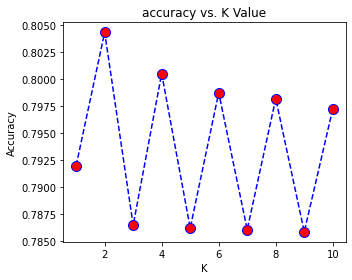

In [106]:
# Identify the K value with maximum accuracy
acc = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_smtom, y_train_smtom)
    yhat = neigh.predict(X_test_pca)
    acc.append(metrics.accuracy_score(Y_test, yhat))
    
plt.figure(figsize=(5,4))
plt.plot(range(1,11),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy is",max(acc),"at K =",acc.index(max(acc))+1)

In [67]:
#Applying the K Nearest Neighbour (KNN) algorithm
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_smtom, y_train_smtom) 
Y_pred_knn = knn.predict(X_test_pca)
acc_knn = round(knn.score(X_train_smtom, y_train_smtom) * 100, 2)
print("Accuracy of model at K=4 is",metrics.accuracy_score(Y_test, Y_pred_knn))

Accuracy of model at K=4 is 0.8043404081075548


<div style="color: #2f80d0"><b>Analysis:</b><br> With identifying the best parameter, k = 4 we could get improved accuracy in the KNN model.</div> 

K Neighbours(KNN)

Confusion Matrix:
          Predicted 0     1
Actual 0         8772  2366
1                 767  2748

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     11138
           1       0.54      0.78      0.64      3515

    accuracy                           0.79     14653
   macro avg       0.73      0.78      0.74     14653
weighted avg       0.83      0.79      0.80     14653

Support Vector Machine(SVM)

Confusion Matrix:
          Predicted 0     1
Actual 0         8422  2716
1                 805  2710

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     11138
           1       0.50      0.77      0.61      3515

    accuracy                           0.76     14653
   macro avg       0.71      0.76      0.72     14653
weighted avg       0.81      0.76      0.77     14653



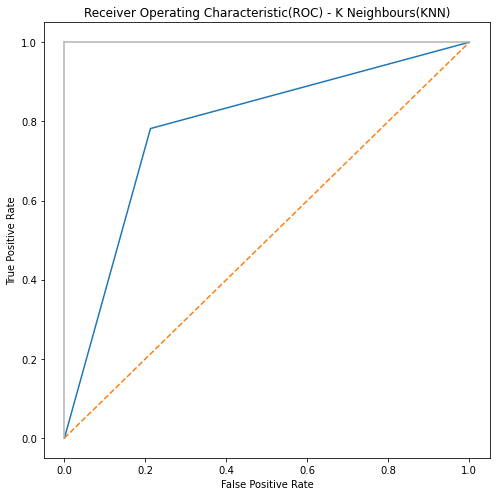

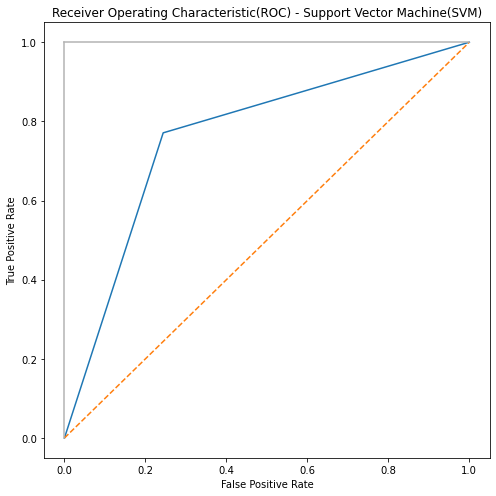

In [69]:
cv_dataFrames = []
    
# Prepare Machine Learning models – KNN and SVM
models = []
models.append(('K Neighbours(KNN)', KNeighborsClassifier())) 
models.append(('Support Vector Machine(SVM)', LinearSVC()))

results = []
mNames = [] #List for collecting model names

#List of scoring metrics for comparison of models
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc'] 

targ_names = ['0', '1'] #List of target values

for mName, model in models: #Looping through each of the models

#Split the dataset into '5' folds and Each fold is used once as a validation while the '5 - 1' remaining folds form the training set
#Shuffle is set to 'True' to shuffle the data before splitting into batches
#Random_state affects the ordering of the indices, which controls the randomness of each fold
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210) 

    #Evaluate metrics by cross-validation
    cv_res = model_selection.cross_validate(model, X_train_smtom, y_train_smtom, cv=kfold, scoring=scoring)

    #Fit the model and predict the label of test set
    ml = model.fit(X_train_smtom, y_train_smtom) 
    y_pred = ml.predict(X_test_pca)

    print(color.BLUE + color.BOLD + mName + color.END)

    #Number of correct and incorrect predictions compared wih Actual class and Predicted class
    cm = confusion_matrix(Y_test, y_pred)

    TN = cm[0][0] #True Negative(Model predicted No and the Actual is also No, classifier is getting things right)
    TP = cm[1][1] #True Positive(Model predicted Yes and the Actual is also Yes, classifier is getting things right)
    FN = cm[1][0] #False Negative(Model predicted No and the Actual is Yes, classifier is getting things wrong i.e, mislabelling)
    FP = cm[0][1] #False Positive(Model predicted Yes and the Actual is No, classifier is getting things wrong i.e, mislabelling)

    print(color.BOLD + "\nConfusion Matrix:" + color.END)

    column_names = ['Predicted 0', '1']
    row_names    = ['Actual 0', '1']

    cm_df = pd.DataFrame(cm, columns=column_names, index=row_names)

    print(cm_df)

    #Report showing the main classification metrics with the target names 'Yes' and 'No'
    print(color.BOLD + "\nClassification Report:" + color.END)
    print(classification_report(Y_test, y_pred, target_names=targ_names))

    #Get False Positive Rates and True Postive rates for the Classifiers
    #By roc_curve module by passing the test dataset and the predicted data through it
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred)

    #Ploting ROC Curves with False Positive Rate on X-axis and True Positive Rate on Y-axis
    title = 'Receiver Operating Characteristic(ROC) - ' + mName
    plt.subplots(1, figsize=(7,7))
    plt.title(title)
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    results.append(cv_res) #Appending the cross validation metrics
    mNames.append(mName) #Appending each of the model names

    dataFrame = pd.DataFrame(cv_res) #Create data frame of cross validation results
    dataFrame['model'] = mName #Add the model name to dataframe
    cv_dataFrames.append(dataFrame) #Append each of the data frames

    result = pd.concat(cv_dataFrames, ignore_index=True) #Concatenate the the dataframes object ingnoring index

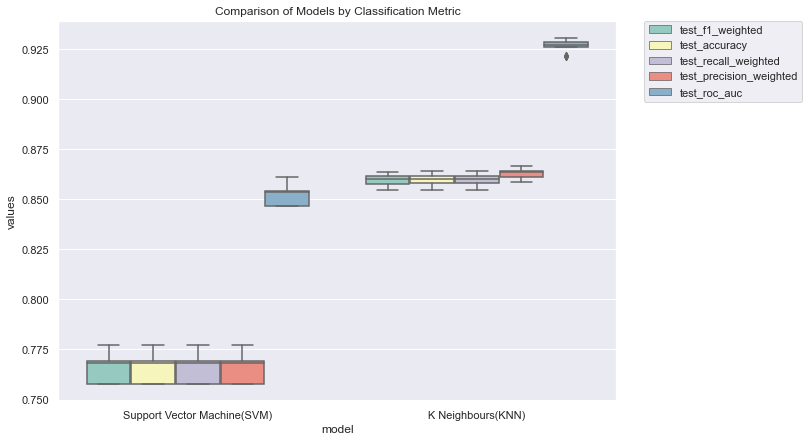

In [44]:
 mlValues = []

#Iterating through result values and append the values of each models to mlValues[]
for model in list(set(result.model.values)): 
    m_dataFrame = result.loc[result.model == model]
    mlValue = m_dataFrame.sample(n=30, replace=True)
    mlValues.append(mlValue)

m_dataFrame = pd.concat(mlValues, ignore_index=True) #Concatenate the the dataframes object ingnoring index

#Massage a DataFrame into a format where identifier variable is 'model', variable column 'metrics' and value column 'values'
perf_results = pd.melt(m_dataFrame,id_vars=['model'],var_name='metrics', value_name='values')

tym_metrics = ['fit_time','score_time'] # Fit time Metrics

#Performance Metrics
perf_results_nofit = perf_results.loc[~perf_results['metrics'].isin(tym_metrics)] # Get dataframe without fit data
perf_results_nofit = perf_results_nofit.sort_values(by='values') #Sort the performance result on its values

#Visualization of Comparison of KNN and SVM Model using BoxPlot
plt.figure(figsize=(10, 7))
plt.title('Comparison of Models by Classification Metric')
sns.set(font_scale=1.0)
g = sns.boxplot(x="model", y="values", hue="metrics", data=perf_results_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [45]:
#Comparison of Performance metrics
metricValues = list(set(perf_results_nofit.metrics.values))
m_dataFrame.groupby(['model'])[metricValues].agg([np.std, np.mean]) #aggregate metric values with standard deviation and mean

test_roc_auc           test_precision_weighted  \
                                     std      mean                     std   
model                                                                        
K Neighbours(KNN)               0.002646  0.926957                0.002555   
Support Vector Machine(SVM)     0.004491  0.852318                0.006306   

                                      test_accuracy            \
                                 mean           std      mean   
model                                                           
K Neighbours(KNN)            0.863102      0.002898  0.859975   
Support Vector Machine(SVM)  0.765809      0.006295  0.765747   

                            test_recall_weighted           test_f1_weighted  \
                                             std      mean              std   
model                                                                         
K Neighbours(KNN)                       0.002898  0.859975         0.002942   
Support Vector Machine(SVM)             0.006295  0.765747         0.006291   

                                       
                                 mean  
model                                  
K Neighbours(KNN)            0.859670  
Support Vector Machine(SVM)  0.765735

<h4 style="color: #2f80d0">4.2 Identify underfitting/overfitting/just right model</h4>

In [46]:
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 11)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = KNeighborsClassifier(n_neighbors=i)
    # fit model on the training dataset
    model.fit(X_train, Y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(Y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(Y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.960, test: 0.808
>2, train: 0.898, test: 0.821
>3, train: 0.901, test: 0.825
>4, train: 0.884, test: 0.832
>5, train: 0.883, test: 0.837
>6, train: 0.875, test: 0.838
>7, train: 0.875, test: 0.837
>8, train: 0.871, test: 0.839
>9, train: 0.870, test: 0.839
>10, train: 0.867, test: 0.841


<div style="color: #2f80d0"><b>Inference:</b><br>KNN model is run on the train and test sets for each number of neighbors and reports their accuracy scores.<br>We can see that accuracy on the training dataset starts at perfect accuracy and falls with almost every increase in the number of neighbors.<br>We can also see that performance of the model on the holdout test improves to a value of about two neighbors, holds level and begins a downward trend after that.</div> 

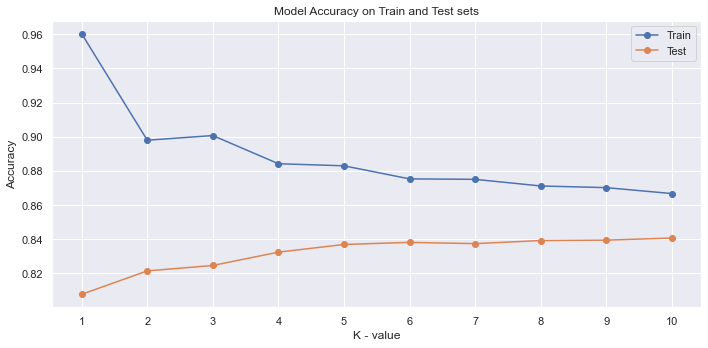

In [60]:
# plot of train and test scores vs number of neighbors
plt.figure(figsize=(10, 5))
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.ylabel('Accuracy')
plt.xlabel('K - value')
plt.title('Model Accuracy on Train and Test sets')
plt.xticks(np.arange(min(values),max(values)+1,1))
plt.legend()
plt.show()

<div style="color: #2f80d0"><b>Inference:</b><br> The figure above shows the line plots of the model accuracy on the train and test sets with different number of neighbors.<br>From the plot, It can be seen that the line plot for the training set is dropping to converge with the line for the test set.<br><br><b>Therefore, our model is just right model</b></div> 